# Installing Tensorflow

Tensorflow Playground: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.75817&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [5]:
#python3 --version
#pip install tensorflow
#pip install tensorflow==2.0
#pip install --ignore-installed --upgrade tensorflow==2.0
#import tensorflow as tf
#tf.__version__

SyntaxError: invalid syntax (1169281837.py, line 2)

# Keras Syntax Basics

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")
df = pd.read_csv("fake_reg.csv")

<IPython.core.display.Javascript object>

## Exploratory Data Analysis and Visualization

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


<IPython.core.display.Javascript object>

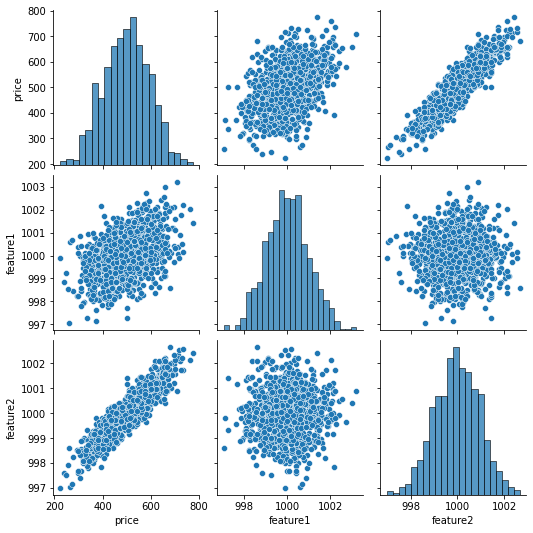

In [6]:
sns.pairplot(df);

In [7]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


## Preprocessing of Data
- Train | Test Split, Scalling

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [10]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_train.shape

(700, 2)

In [14]:
X_test.shape

(300, 2)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train.max()

1.0

In [20]:
X_train.min()

0.0

In [21]:
X_test.max()

1.0186515935232023

In [22]:
X_test.min()

-0.014108392024525074

## Modelling

In [6]:
import tensorflow as tf

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [1]:
help(Sequential)

NameError: name 'Sequential' is not defined

In [2]:
help(Dense)

In [3]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"), # Layer-1
                    Dense(units = 4, activation = "relu"), # Layer-2
                    Dense(units = 4, activation = "relu"), # Layer-3
                    Dense(units = 1)]) # output

NameError: name 'Sequential' is not defined

In [4]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1]
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

NameError: name 'Sequential' is not defined

In [5]:
model.compile(optimizer = "rmsprop", loss = "mse") # optimizer default None dır

NameError: name 'model' is not defined

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [6]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

NameError: name 'model' is not defined

In [ ]:
model.summary() # 12 = Layer 1 de yer alan 2(xw)+2(xw)+2(xw)+2(xw)+2(bias) = 12

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.25482386,  2.1041868 ,  1.1887506 , -0.64314747],
        [-0.08718135,  3.3057606 ,  3.455549  , -0.37148046]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([-0.2001257,  0.6996925,  0.6050841,  0.       ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.26577896, -0.0557948 ,  0.67427105,  0.16559586],
        [ 2.789813  ,  2.4617841 , -0.10281432,  2.392338  ],
        [ 2.146499  ,  2.4031339 , -0.30560338,  2.5547624 ],
        [ 0.7740764 , -0.33456612,  0.43562526,  0.49200302]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.8274609 ,  0.53459316, -0.08753186,  0.5655562 ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.6862223 , -0.52799106,  2.0396426 ,  0.03366186],
        [ 1.5684335 ,  0.22517735,  

In [ ]:
model.history.history

{'loss': [257137.6875,
  256908.984375,
  256738.53125,
  256591.265625,
  256466.125,
  256346.453125,
  256215.34375,
  256073.078125,
  255906.859375,
  255701.578125,
  255455.8125,
  255164.3125,
  254825.03125,
  254437.53125,
  253997.328125,
  253513.828125,
  252982.234375,
  252393.078125,
  251744.3125,
  251024.609375,
  250236.34375,
  249368.390625,
  248422.53125,
  247382.03125,
  246262.125,
  245045.140625,
  243720.4375,
  242296.484375,
  240768.65625,
  239128.234375,
  237359.796875,
  235471.203125,
  233447.046875,
  231304.40625,
  229026.078125,
  226610.8125,
  224051.390625,
  221345.28125,
  218485.21875,
  215464.890625,
  212302.578125,
  208966.328125,
  205478.46875,
  201804.953125,
  197975.171875,
  193995.890625,
  189845.046875,
  185521.21875,
  181042.84375,
  176371.796875,
  171544.484375,
  166540.890625,
  161405.34375,
  156119.25,
  150659.578125,
  145105.5625,
  139389.65625,
  133556.921875,
  127582.5703125,
  121514.4765625,
  115382.7

In [ ]:
pd.DataFrame(model.history.history)

,loss
0,257137.688
1,256908.984
2,256738.531
3,256591.266
4,256466.125
...,...
245,23.926
246,24.247
247,24.338
248,24.371


<AxesSubplot:>

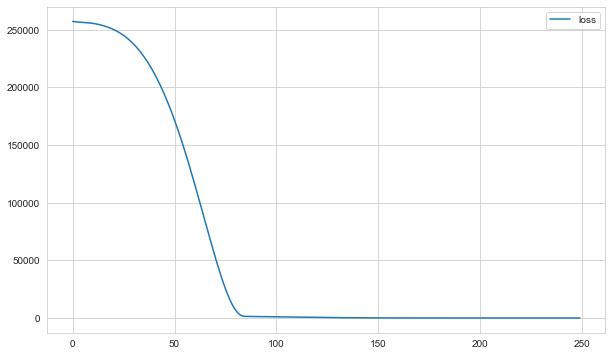

In [ ]:
# Her çalıştırmada ayrı değerler çıkar, çıkmaz ise eğitilmezise, optimizer değiştir 
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

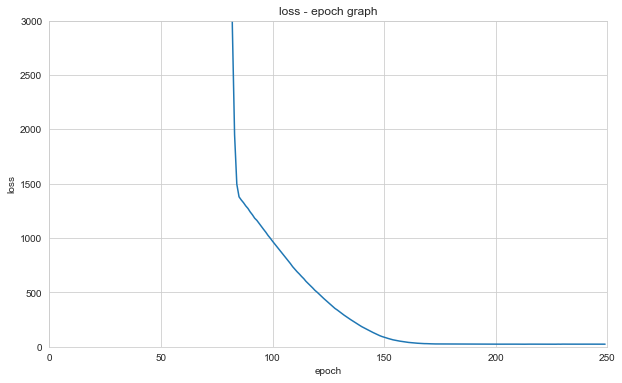

In [ ]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [ ]:
model.evaluate(X_train, y_train, verbose=0) # her epoch sonucu min loss function değeridir

28.024221420288086

In [ ]:
model.evaluate(X_test, y_test, verbose=0) # her epoch sonucu min loss function değeridir

31.324052810668945

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
explained_variance_score(y_test, y_pred)

0.9971268944168279

In [ ]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
28,656.655,658.486
279,273.433,274.713
9,451.804,449.684
23,379.110,380.574
136,415.443,416.897
47,498.628,492.757
125,618.934,619.323
65,593.475,589.149
298,417.570,418.979
181,499.212,502.968


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

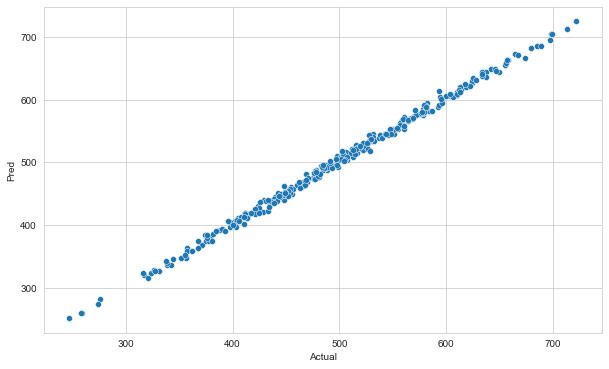

In [ ]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.9964372220146177 
mae: 4.552067251538345 
mse: 31.324056864316347 
rmse: 5.596789871374156


## Final Model and Model Deployment

In [ ]:
scaler = MinMaxScaler().fit(X)

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 257468.9219
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257405.5156
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257373.5625
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 257341.6875
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 257309.7031
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 257277.7500
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 257245.9375
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 257214.0938
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 257182.2500
Epoch 10/250
32/32 [==============================] - 0s 635us/step - loss: 257150.3438
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 257118.4531
Epoch 12/250
32/32 [==============================] - 0s 1ms/

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [ ]:
model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_fake_reg = load_model('model_fake_reg.h5')

In [ ]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [ ]:
sample = [[998, 1000]]

In [ ]:
sample_scaled = scaler_fake_reg.transform(sample)

In [ ]:
model_fake_reg.predict(sample_scaled)

array([[419.6473]], dtype=float32)

## Prediction-2

In [ ]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [ ]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [ ]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [ ]:
model_fake_reg.predict(sample_scaled)

array([[379.98642],
       [332.33572],
       [284.68497],
       [237.03424],
       [189.38353]], dtype=float32)